# Hooke- Jeeves

The Hooke-Jeeves method traverses the search space based on evaluations at small steps in each coordinate direction. At every iteration, the Hooke's Jeeves method evaluates $f(x) \text{ and } f(x+\alpha e^{(i)})$ for a given step $\alpha$ in every conjugate direction from an anchoring point $x$. It accepts only improvement it may find. If no improvements are found, it will decrease the step size. The process repeats until the step size is sufficiently small. 

One step of the Hooke's Jeeves method requires $2n$ function evaluations for an n-dimensional problem, which can be expensive for problems with many dimensions. The Hooke-Jeeves method is suseptible to local minima. The method has been proven to converge on certain cases of function.

## Algorithm

The Hooke-Jeeves method, whch takes the target function $f$, a stating point $x$,a starting step size $\alpha$, a tolerance $\epsilon$, and a step decay $\gamma$. The method runs until the step size is less than epsilon and the points sampled along the coordinate direction do not provide an improvement.

```
function hooke_jeeves(f,x,eps,alpha,gamma= 0.5)
y, n = f(x),length(n)
while alpha > eps:
  improvement = False
  x_best, y_best = x,y
  for i in 1:n:
    for sgn in (-1,1):
      x' = x +sgn*basis(i,n)*alpha
      y'= f(x')
      if y' < y_best:
        x_best, y_best, improvement = x',y',True
      end
    end
  end
  x,y = x_best, y_best
  if !improvement:
    alpha*= gamma
  end
end
  return x
end
```

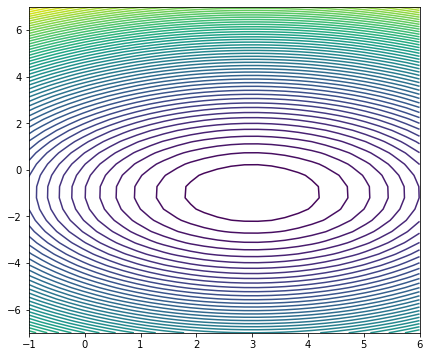

In [2]:
# Contour plot of the function on which cyclic_coordinate_descent algorithm will be implemented
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x1 = np.linspace(-1,6,30)
x2 = np.linspace(-7,7,30)

# Creating 2-D grid of features
[X, Y] = np.meshgrid(x1,x2)
Z = (X-3)**2 + (Y+1)**2
plt.figure(figsize=(7,6))
plt.contour(X,Y,Z,55)
plt.show()

In [35]:
def hooke_jeeves(f,x,alpha,eps,gamma=0.5):

  # Initialize the values of y,n, d = (Acts as our basis vector), h = counter to record the number of cycles 
  y, n = f(x[0],x[1]), len(x)
  d = np.zeros(n)
  h = 0

  # Specifying lists to record the intermediary values of hyper-parameters,x's and function value during algorithm execution 
  lst_alpha = []
  lst_x_best = []
  lst_y_best = []
  x_0 = []
  x_1 = []

  while alpha > eps:
    h+=1
    lst_alpha.append(alpha)
    improvement = False
    x_best, y_best = x,y
    lst_x_best.append(x_best) ; lst_y_best.append(y_best)

    for i in range(0,n):
      d[i] = 1

      for sgn in (-1,1):
        x1 = x + sgn*alpha*d
        y1 = f(x1[0],x[1])

        # To record the evaluations steps of Hooke-Jeeves
        if i==0:
          x_0.append(x1[0])
        else:
          x_1.append(x1[1])

        if y1 < y_best:
          x_best,y_best,improvement = x1,y1,True

      d = np.zeros(n)

    x,y = x_best, y_best
    lst_x_best.append(x_best) ; lst_y_best.append(y_best)

    if improvement!= True:
      alpha*=gamma

  return lst_x_best,lst_y_best,x_0,x_1,lst_alpha,h,x


In [61]:
f = lambda x,y: (x-3)**2 + (y+1)**2
x = [-1,6]
alpha = 0.5
eps = 1e-4
lst_x_best,lst_y_best,x_0,x_1,lst_alpha,h,x = hooke_jeeves(f,x,alpha,eps,gamma=0.5)
print("The next design point after [-1,6] is %d",x)

The next design point after [-1,6] is %d [3. 6.]


### Plotting the behavior of changing function values, hyper-parameters over the interval of the execution

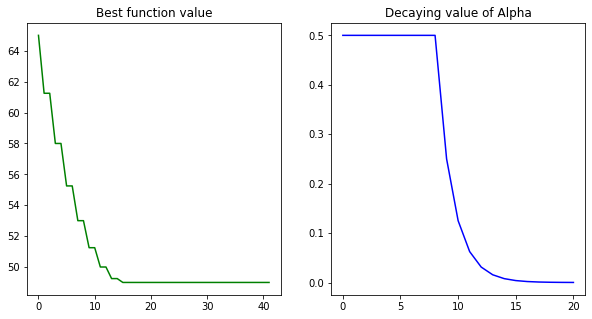

In [67]:

fig,(ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))
x1 = range(0,h*2)
x2 = range(0,h)

ax1.set_title('Best function value')
ax1.plot(x1,lst_y_best,color="green")


ax2.set_title('Decaying value of Alpha')
ax2.plot(x2,lst_alpha,color="blue")


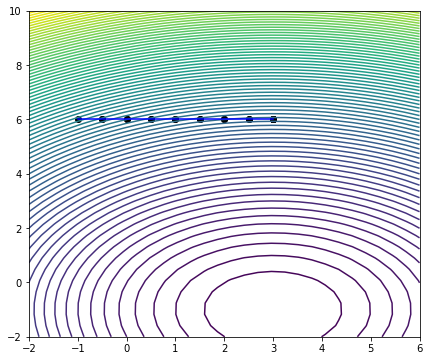

In [66]:
x1 = np.linspace(-2,6,30)
x2 = np.linspace(-2,10,30)

arr = pd.DataFrame(lst_x_best)
# Creating 2-D grid of features
[X, Y] = np.meshgrid(x1,x2)
Z = (X-3)**2 + (Y+1)**2

a,b  = arr[0],arr[1]
plt.figure(figsize=(7,6))
plt.scatter(a,b,color="black")
plt.contour(X,Y,Z,90)
plt.plot(a,b,color="blue")
plt.show()